In [1]:
#IMPORT CONSTANTS

import numpy as np
from matplotlib import pyplot as plt
import cv2
%matplotlib inline
import copy


import vision_tools as vt

import kinect_vision as kv
from kinect_vision import PATH_TO_KINECT_IMAGES_DIR

In [2]:

import pandas as pd
def create_object_df():
    obj_df = pd.DataFrame(columns = ['name', 
                                     'area', 
                                     'aspect',###### 
                                     'fill', ######
                                     'circularness',##### 
                                     'number of children',#####
                                     'rgb_area',
                                     'rgb_aspect',#####
                                     'rgb_fill',#####
                                     'rgb_circularness',#####
                                     'rgb_average',#####
                                     'median_height',#####
                                     'mean_height' #####
                                    ])
    return obj_df

def prepare_object_dict(tableObject, obj_df):
    copy.copy(tableObject)
    object_dict = tableObject.return_object_attributes()
    
    
    box = tableObject.rgb_box
    first_line = np.sqrt(sum((box[1]-box[0])**2))
    second_line = np.sqrt(sum((box[2]-box[1])**2))
    rgb_aspect = first_line/second_line
    if rgb_aspect > 1:
        rgb_aspect = second_line/first_line
    object_dict['rgb_aspect'] = rgb_aspect
    
    rgb_boundBoxArea = cv2.contourArea(tableObject.rgb_box)
    rgb_fill = tableObject.rgb_area/rgb_boundBoxArea
    object_dict['rgb_fill'] = rgb_fill
    
    rgb_boundCircleArea = np.pi*(tableObject.rgb_radius)**2
    rgb_circularness = tableObject.rgb_area/rgb_boundCircleArea
    object_dict['rgb_circularness'] = rgb_circularness
    
    try:
        # FILL
        boundBoxArea = cv2.contourArea(tableObject.box)
        fill = tableObject.area/boundBoxArea
        
        # ASPECT
        box = tableObject.box
        first_line = np.sqrt(sum((box[1]-box[0])**2))
        second_line = np.sqrt(sum((box[2]-box[1])**2))
        aspect = first_line/second_line
        if aspect > 1:
            aspect = second_line/first_line
            
        # CIRCULARNESS
        boundCircleArea = np.pi*(tableObject.radius)**2
        circularness = tableObject.area/boundCircleArea
        
        # NUMBER OF CHILDREN
        object_dict['number of children'] = len(tableObject.children)
        
        # HEIGHTS
        median_height = tableObject.height[0]
        mean_height = tableObject.height[1]
        
    except:
        aspect = rgb_aspect
        circularness = rgb_circularness
        fill = rgb_fill
        median_height = 0
        mean_height = 0
        object_dict['number of children'] = 0
        
    object_dict['aspect'] = aspect
    object_dict['circularness'] = circularness
    object_dict['fill'] = fill
    object_dict['median_height'] = median_height
    object_dict['mean_height'] = mean_height
    
    
    for key in object_dict.keys():
        if key not in obj_df.head():
            del object_dict[key]
    return object_dict


    
def create_csv(filename, df):
    if len(filename)>4:
        if filename[-4:]!=".csv":
            filename = filename + ".csv"
    header = df.keys()
    df.to_csv(filename, columns = header)
    print "done"

def add_to_csv(filename, df):
    with open(filename, 'a') as f:
        df.to_csv(f, header=False)

In [3]:
#directory = kv.run_kinect_server()
directory = PATH_TO_KINECT_IMAGES_DIR

{'radius': [10, 16], 'thresh': [85, 220]}
9
All Calibration points found


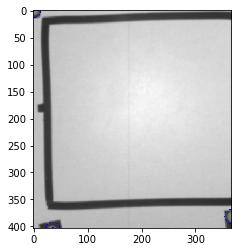

Continue?: yes
{'radius': [5, 8], 'thresh': [85, 220]}
22
All Calibration points found


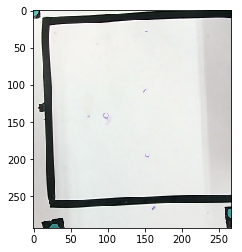

Continue?: yes
[1]
[3]
[5]
Depth Done
[1, 2, 3, 4, 5, 6, 7]
[9]
[12, 13, 14]


In [15]:
test_num2 = str(1)
test_num = str(1)

test = kv.load_npz_as_array("im_array_"+test_num2, directory)
cali = kv.load_npz_as_array("im_array_cal"+test_num, directory)
empt = kv.load_npz_as_array("im_array_empty"+test_num, directory)

test_all = kv.prepare_im_array(test)
empt_all = kv.prepare_im_array(empt)
cali_all = kv.prepare_im_array(cali)


from image_processing import run_image_processing

from image_processing import run_calibration, run_calibration_rgb
from image_processing import run_image_processing_v2_depth, run_image_processing_v2_rgb

depth_cali = run_calibration(empt_all, cali_all)
rgb_cali = run_calibration_rgb(empt_all, cali_all, depth_cali)



sorted_family, normclean = run_image_processing_v2_depth(test_all, depth_cali, show=False)
rgbnormclean, rgb_family, test_rgbx_img = run_image_processing_v2_rgb(test_all, rgb_cali, depth_cali, show=False)



#normclean, sorted_family, rgbnormclean, rgb_family, test_rgbx_img=run_image_processing(test, empt, cali, adjust=False, show=False)

In [16]:
normclean

array([[ 0.04336108,  0.0465071 ,  0.0424362 , ...,  0.01870749,
         0.01411439,  0.        ],
       [ 0.05318839,  0.04415174,  0.05178284, ...,  0.0273421 ,
         0.02588798,  0.        ],
       [ 0.01723931,  0.02027475,  0.04547867, ...,  0.00147727,
         0.01027487,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.01598205, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01541702,  0.01686411,  0.03170382, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00992076,  0.01108151,  0.01569442, ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [17]:
from vision_tools import normclean2cv2
depth_normclean = normclean2cv2(normclean)
rgb_normclean = normclean2cv2(rgbnormclean)

test_rgb_img = vt.convert2rgb(test_rgbx_img[0])

b,g,r,x = cv2.split(test_rgbx_img)
test_rgb_img = cv2.merge([r,g,b])


In [22]:
from tableObject_class import find_object
depth_list = find_object(depth_normclean, family=sorted_family, label=False)
obj_list = find_object(test_rgb_img, rgb_family = rgb_family, label=False)

1
RGB data not considered
Depth data not implemented
3
RGB data not considered
Depth data not implemented
5
RGB data not considered
Depth data not implemented
Depth data not implemented
item
Depth data not implemented
item
Depth data not implemented
item
Depth data not implemented
item


In [81]:
for item in obj_list.keys():
    contour = obj_list[item].item_contour[0]
    mask = vt.create_contour_mask([contour], depth_normclean)
    final = 0
    most_likely_depth = '0'
    
    for depth_item in depth_list.keys():
        
        depth_contour = depth_list[depth_item].contour[0]
        total = len(depth_contour)
        inside = 0
        
        for point in depth_contour:
            check = cv2.pointPolygonTest((contour), 
                                                   (point[0][0],point[0][1]), 
                                                   measureDist=True)
            if check>0:
                inside = inside+1
                
        frac = float(inside)/total
        
        if frac>final:
            final=frac
            most_likely_depth = depth_item
    
    if most_likely_depth == '0':
        print item, ": No depth profile found"
        
    else:
        mask2 = vt.create_contour_mask([depth_list[most_likely_depth].contour[0]], depth_normclean)
        mask = mask-mask2
        obj_list[item].add_depth(depth_list[most_likely_depth])
        
    #plt.figure()
    #plt.imshow(mask)
    #plt.show()
    
    
        
        

4 : No depth profile found


In [84]:
obj_list['1'].height[0]

0.082129553

In [89]:
obj_list['4'].rgb_centre

(147.0933074951172, 36.43779754638672)

1
RGB data considered
Depth data implemented
depth


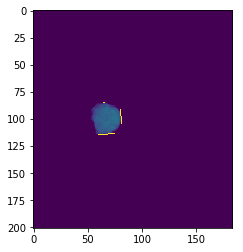

Name of object?: tape measure
3
RGB data considered
Depth data implemented
depth


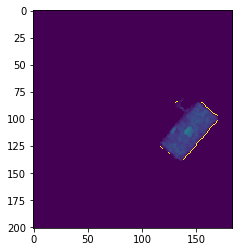

Name of object?: eraser
5
RGB data considered
Depth data implemented
depth


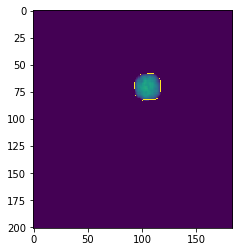

Name of object?: ball
Depth data implemented
item
item


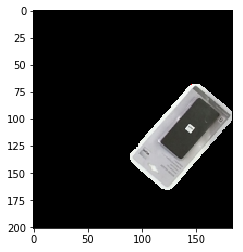

Name of object?: eraser
Depth data implemented
item
item


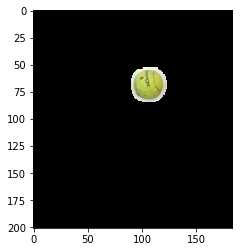

Name of object?: ball
Depth data implemented
item
item


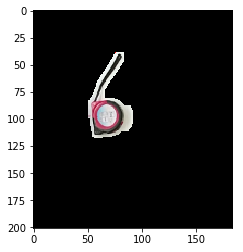

Name of object?: tape measure
Depth data implemented
item
item


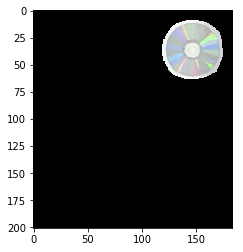

Name of object?: cd


In [7]:

from tableObject_class import TableObject, match_rgb_with_depth
object_list = match_rgb_with_depth(sorted_family, rgb_family, depth_normclean, test_rgb_img, label=True)

In [29]:
ball_object = object_list['ball']
cd_object = object_list['cd']
tape_object = object_list['tape measure']

In [30]:
cd_object.return_object_attributes()

{'children': [],
 'generation': 0,
 'height': (0, 0, 0, 0),
 'item_contour': [array([[[140,   9]],
  
         [[139,  10]],
  
         [[137,  10]],
  
         [[136,  11]],
  
         [[134,  11]],
  
         [[133,  12]],
  
         [[132,  12]],
  
         [[130,  14]],
  
         [[129,  14]],
  
         [[124,  19]],
  
         [[124,  20]],
  
         [[122,  22]],
  
         [[122,  23]],
  
         [[121,  24]],
  
         [[121,  26]],
  
         [[120,  27]],
  
         [[120,  30]],
  
         [[119,  31]],
  
         [[119,  41]],
  
         [[120,  42]],
  
         [[120,  46]],
  
         [[121,  47]],
  
         [[121,  49]],
  
         [[122,  50]],
  
         [[122,  51]],
  
         [[124,  53]],
  
         [[124,  54]],
  
         [[129,  59]],
  
         [[130,  59]],
  
         [[131,  60]],
  
         [[132,  60]],
  
         [[133,  61]],
  
         [[135,  61]],
  
         [[136,  62]],
  
         [[138,  62]],
  
         [[139

In [14]:
def find_closest_contour(point, family):
    closest_contour=family[0]
    closest_contour['distance'] = cv2.pointPolygonTest((family[0]['contour'][0]), 
                                                   (point[0],point[1]), 
                                                   measureDist=True)
    print len(family)
    for i in range(len(family)):
        distance = cv2.pointPolygonTest((family[i]['contour'][0]), 
                                        (point[0],point[1]), 
                                        measureDist=True)
        print distance, closest_contour['distance']
        if abs(distance)<abs(closest_contour['distance']):
            closest_contour = family[i]
            closest_contour['distance']=distance
    return closest_contour

def find_point_generation(point, family):
    closest_contour = find_closest_contour(point, family)
    print "CONTOUR_ID: ", closest_contour['id']
    distance = cv2.pointPolygonTest(closest_cnt['contour'][0], 
                                    (point[0],point[1]), measureDist=True)
    if distance < 0:
        print "OUTSIDE NEAREST CONTOUR"
        child_count = 0
        for member in family:
            if closest_contour['id'] in member['children']:
                print "INSIDE PARENT"
                parent_dist = cv2.pointPolygonTest(member['contour'][0],
                                                  (point[0], point[1]), measureDist=True)
                if parent_dist<0:
                    print "SOMETHING WRONG HAS HAPPENED"
                else:
                    point_generation = member['generation']
                    child_count = child_count + 1
        if child_count == 0:
            point_generation = closest_contour['generation']-1
    else:
        point_generation = closest_contour['generation']
    
    return point_generation

from scipy.spatial.distance import cdist
def closest_node(node, contour):
    nodes = []
    for points in contour:
        nodes.append(points[0])
    return nodes[cdist([node], nodes).argmin()], cdist([node], nodes).argmin()

def pnt2line(pnt, start, end):
    line_vec = end-start
    pnt_vec = pnt-start
    line_len = np.sqrt(line_vec[0]**2+line_vec[1]**2)
    #print line_vec, line_len
    line_unitvec = (line_vec)/line_len
    pnt_vec_scaled = pnt_vec*1.0/line_len
    t = np.dot(line_unitvec, pnt_vec_scaled)    
    if t < 0.0:
        t = 0.0
    elif t > 1.0:
        t = 1.0
    nearest = line_vec*t
    dist = np.sqrt(sum((pnt_vec-nearest)**2))
    nearest = start + nearest
    return (dist, nearest)

In [20]:
#consider ball_object

def find_grasping_points(table_object, family):
    closest_contour = find_closest_contour(table_object.centre, family)
    
    first_node1, node1_id = closest_node(table_object.centre, closest_contour['contour'][0])
    
    first_neighbours = closest_contour['contour'][0][node1_id-1:node1_id+2:2]
    
    first_node2, node2_id = closest_node(table_object.centre, first_neighbours)
    
    print "First Node1: ", first_node1
    print "First Node2: ", first_node2
    dist, first_node = pnt2line(table_object.centre, first_node1, first_node2)
    print dist, first_node
    
    return first_node

In [21]:
first_node = find_grasping_points(ball_object, ball_object.nuclear)


2
11.5 11.5
5.65685424949 11.5
First Node1:  [101  67]
First Node2:  [102  66]
5.65685424949 [ 101.5   66.5]


In [ ]:
ball_object.id

In [ ]:
a = [(0,0), (1,1), (3,3)]

b = [(0.1, 0), (3, 3.2), (1.5, 1), (1.1, 1.1)]

def join_coordinates(a,b):
    max_items = max(len(a), len(b))
    
    for items in len(range(max_items)):
        

In [ ]:
closest_cnt = family[0]
closest_cnt['distance'] = cv2.pointPolygonTest((family[0]['contour'][0]), 
                                               (cv2_current_centre[0],cv2_current_centre[1]), 
                                               measureDist=True)
#centre_generation = closest_cnt['generation'] + int(distance/abs(distance))

for i in accepted:
    distance = cv2.pointPolygonTest((family[i]['contour'][0]), (object_centres[0][1], object_centres[0][0]), measureDist=True)
    print "Object Centre to Contour ", i, " Distance: ", distance
    if abs(distance)<abs(closest_cnt['distance']):
        closest_cnt = family[i]
        closest_cnt['distance'] = distance
        #centre_generation = closest_cnt['generation'] + int(distance/abs(distance))

#dist_ref = 200
#nearest_point = [0,0]
#for i in possible_pairs:
#    dist, nearest = pnt2line(first_node, i[0], i[1])
 #   if dist_ref>dist:
 #       dist_ref = dist
 ##       print dist
 #       second_node = [int(p) for p in nearest]#
#print second_node
        
current_cnt = []
for points in closest_cnt['contour'][0]:
    current_cnt.append(points[0])
first_node1 = closest_node(cv2_current_centre, current_cnt)

for qq, pp in enumerate(closest_cnt['contour'][0]):
    #print pp[0]
    if np.all(pp[0]==first_node1):
        if pp[0][0]==first_node1[0] and pp[0][1]==first_node1[1]:
            first_node1_location =qq

first_neighbours=closest_cnt['contour'][0][first_node1_location-1:first_node1_location+2:2]
#print [abs(g[0][0]**2 + g[0][1]**2) for g in first_neighbours]
print first_neighbours, first_node1
first_node2 = first_neighbours[np.argmin([abs((g[0][0]-cv2_current_centre[0])**2 
                                                  + (g[0][1]-cv2_current_centre[1])**2) for g in first_neighbours])]
first_node2 = first_node2[0]

print "First Node1: ", first_node1
print "First Node2: ", first_node2
dist, first_node = pnt2line(cv2_current_centre, first_node1, first_node2)
print dist, first_node

#Find first node:
current_cnt = []
#for points in closest_cnt['contour'][0]:
#    current_cnt.append(points[0])
#first_node = closest_node(cv2_current_centre, current_cnt)
print "Object Centre: ", cv2_current_centre
print "First Node: ", first_node


#current_line = 
#print "current", current_line

vect = first_node2-first_node1
print "Vector: ", vect
gradient = float(vect[1])/vect[0]
print gradient
if gradient == 0:
    current_line = [0.0, 1.0]
else:
    perp_grad = -1/gradient
    current_line = [1.0, perp_grad]

print "Perpendicular Line",current_line
#current_line = second_node-first_node
possible_pairs = []
for x in accepted:
    sec_cnt = []
    for points in family[x]['contour'][0]:
        sec_cnt.append(points[0])
    #print sec_cnt
    for i,j in enumerate(sec_cnt):
        #print j
        if i>0:
            check1 = sec_cnt[i-1] - first_node
            check2 = sec_cnt[i] - first_node
            sign1 = check1[0]*current_line[1] - check1[1]*current_line[0]
            sign2 = check2[0]*current_line[1] - check2[1]*current_line[0]
            #print sign1, sign2
            #print (sign1/abs(sign1), sign2/abs(sign2))
            
            if sign1*sign2 <0:
                possible_pairs.append([sec_cnt[i-1], sec_cnt[i]])
                
#print "Possible Pairs: ",possible_pairs
#print "Length: ", len(possible_pairs)

for pair_num,pair in enumerate(list(reversed(possible_pairs))):
    #print "Checking current pair: ", pair_num, pair
    #print "Against: ", first_node1, " and ", first_node2
    if np.array_equal(first_node1, pair[0]) or np.array_equal(first_node1, pair[1]):
        if np.array_equal(first_node2, pair[0]) or np.array_equal(first_node2, pair[1]):
            #print possible_pairs
            print pair
            possible_pairs.pop(-(pair_num+1))
                
print "possible second_pair: ", possible_pairs  
print len(possible_pairs)

possible_second_node=[]
for i in possible_pairs:
    dist, nearest = pnt2line(first_node, i[0], i[1])
    possible_second_node.append([p for p in nearest])
#print "Possible Second Nodes: ", possible_second_node
#print  "Length possible second nodes: ", len(possible_second_node)
actual_grasp_centre = []

remove_snode = []
for num_snode, snode in enumerate(possible_second_node):
    node_separation = snode - first_node
    grasp_centre = first_node + node_separation/2
    print "...............................", snode
    print "GRASP CENTRE: ",grasp_centre
            
    grasp_node1 = first_node - node_separation*0.02
    grasp_node2 = snode + node_separation * 0.02
    grasp_gen = {}
    for gnum, grasp_point in enumerate([grasp_node1, grasp_centre, grasp_node2]):
        grasp_gen[gnum]=find_point_generation(grasp_point, family)
        print gnum, "+++++++++++++++",grasp_gen
        print grasp_point
    print "Grasp generations: ", grasp_gen
    print ""
    if grasp_gen[0]!=grasp_gen[2]:
        remove_snode.append(num_snode)
        print "::::: Grasping points at different levels"
    elif grasp_gen[1]<grasp_gen[0]:
        remove_snode.append(num_snode)
        print "::::; Grasping points are around hollow"
    else:
        print "::::: PERFECT"
        p
        actual_grasp_centre.append(grasp_centre)
    print ''

for i in list(reversed(remove_snode)):
    possible_second_node.pop(i)

print actual_grasp_centre
grasping_limit = 200
second_node = possible_second_node[0]


for snode in possible_second_node:
    node_dist = np.sqrt(sum((snode-first_node)**2))
    if node_dist < grasping_limit:
        grasping_limit = node_dist
        second_node = snode
        actual_grasp_centre = (snode+first_node)/2
        
print "Final Second Node: ", second_node
print "Actual Grasp Centre: ", actual_grasp_centre





In [ ]:
ball_object.children

In [ ]:


def find_point_generation(point, family):
    closest_contour = find_closest_contour(point, family)
    print "CONTOUR_ID: ", closest_contour['id']
    distance = cv2.pointPolygonTest(closest_cnt['contour'][0], 
                                    (point[0],point[1]), measureDist=True)
    if distance < 0:
        print "OUTSIDE NEAREST CONTOUR"
        child_count = 0
        for member in family:
            if closest_contour['id'] in member['children']:
                print "INSIDE PARENT"
                parent_dist = cv2.pointPolygonTest(member['contour'][0],
                                                  (point[0], point[1]), measureDist=True)
                if parent_dist<0:
                    print "SOMETHING WRONG HAS HAPPENED"
                else:
                    point_generation = member['generation']
                    child_count = child_count + 1
        if child_count == 0:
            point_generation = closest_contour['generation']-1
    else:
        point_generation = closest_contour['generation']
    
    return point_generation



In [ ]:
import grasping_points as gp

gp.find_closest_contour(ball_object.centre)

import pandas as pd
object_df = create_object_df()
create_csv("object2.csv", object_df)

for item in object_list.keys():
    dic = prepare_object_dict(object_list[item],object_df)
    object_df = object_df.append(dic, ignore_index=True)

add_to_csv("object2.csv", object_df)

In [ ]:
a=object_list['cup'].return_object_attributes()
b,g,r,x = cv2.split(test_rgbx_img)
test_rgb_img = cv2.merge([r,g,b])